In [3]:
# Import necessary libraries
import pandas as pd  # data manipulation and analysis
import numpy as np  # numerical operation and array handlings
import matplotlib.pyplot as plt  # data visualipytzation
import seaborn as sns  # statistical data visualization
from scipy import stats  # statistical analysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from imblearn.over_sampling import SMOTE  # handling imbalanced datasets
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Load data from CSV file
df = pd.read_csv("data/health_lifestyle_classification.csv")

In [4]:
# Display first few rows of the dataframe to understand its structure and contents
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [5]:
# Returns numbers of rows and columns in the dataframe
df.shape 

(100000, 48)

In [6]:
# Returns information about the dataframe, including column names, data types, and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [7]:
# Returns summary statistics for numerical columns in the dataframe
df.describe().transpose()    

,count,mean,std,min,25%,50%,75%,max
survey_code,100000.0,50000.500000,28867.657797,1.000000,25000.750000,50000.500000,75000.250000,100000.000000
age,100000.0,48.525990,17.886768,18.000000,33.000000,48.000000,64.000000,79.000000
height,100000.0,170.023707,9.982798,140.000000,163.306615,170.016778,176.728920,210.000000
weight,100000.0,70.064862,14.693667,40.000000,59.856938,69.924141,80.027418,139.250894
bmi,100000.0,24.493876,5.951069,9.988495,20.271405,24.156734,28.258696,59.234792
bmi_estimated,100000.0,24.493876,5.951069,9.988495,20.271405,24.156734,28.258696,59.234792
bmi_scaled,100000.0,73.481627,17.853206,29.965484,60.814215,72.470201,84.776088,177.704377
bmi_corrected,100000.0,24.494140,5.954184,9.893845,20.271059,24.151699,28.247648,59.142646
waist_size,100000.0,84.933043,12.040314,34.093185,76.795185,84.957139,93.018713,133.153631
blood_pressure,92331.0,119.980149,15.015503,59.128168,109.812060,119.951794,130.120621,184.439195


In [8]:
# Drop irrelevant columns from the dataframe
# Removing:
# - survey_code: Identifier that doesn't contribute to analysis
# - bmi_estimated, bmi_scaled, bmi_corrected: Redundant BMI calculations
# - screen_time, device_usage: Not directly related to health outcomes
df = df.drop(columns=["survey_code", "bmi_estimated", "bmi_scaled", "bmi_corrected", "screen_time", "device_usage"])

In [9]:
# Display the remaining columns to verify the drop operation
df.columns


Index(['age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'stress_level', 'mental_health_score',
       'mental_health_support', 'education_level', 'job_type', 'occupation',
       'income', 'diet_type', 'exercise_type', 'healthcare_access',
       'insurance', 'sunlight_exposure', 'meals_per_day', 'caffeine_intake',
       'family_history', 'pet_owner', 'electrolyte_level', 'gene_marker_flag',
       'environmental_risk_score', 'daily_supplement_dosage', 'target'],
      dtype='object')

In [10]:
# Check for duplicate values in each column
# Iterate through all columns to identify and count duplicates
for col in df.columns:
    # Count duplicated values in each column
    duplicated_count = df[col].duplicated().sum()
    print(f"Column: {col}")
    print(f"Number of duplicated values: {duplicated_count}")
    print("-" * 50)

Column: age
Number of duplicated values: 99938
--------------------------------------------------
Column: gender
Number of duplicated values: 99998
--------------------------------------------------
Column: height
Number of duplicated values: 157
--------------------------------------------------
Column: weight
Number of duplicated values: 2297
--------------------------------------------------
Column: bmi
Number of duplicated values: 4
--------------------------------------------------
Column: waist_size
Number of duplicated values: 0
--------------------------------------------------
Column: blood_pressure
Number of duplicated values: 7668
--------------------------------------------------
Column: heart_rate
Number of duplicated values: 14002
--------------------------------------------------
Column: cholesterol
Number of duplicated values: 0
--------------------------------------------------
Column: glucose
Number of duplicated values: 0
---------------------------------------------

In [11]:
# Check for rows with duplicate BMI values
# This helps identify if multiple people have the same BMI
duplicated_multi_cols = df[df.duplicated(subset=['bmi'],keep=False)]

In [12]:
# Display the number of rows with duplicate BMI values
duplicated_multi_cols.shape

(5, 42)

In [13]:
duplicated_multi_cols.sort_values('bmi')

# I didn't find any duplicate values for bmi as each data point represent an individual of different age
# As for other features, I think it is normal to have duplicates 

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
5654,68,Female,140.0,40.0,20.408163,84.483693,105.162371,82.930823,212.129612,74.617178,16.095002,6.714451,Fair,6.713497,4.368933,6659.941279,2026.043383,78.035624,Regularly,Light,1.968139,5,4,No,PhD,Labor,Artist,4869.203574,Vegetarian,NaN,Poor,No,High,3,High,No,No,0,1.0,5.5,-0.097804,healthy
28870,33,Female,140.0,40.0,20.408163,70.253045,135.606755,73.008299,159.707107,98.150324,20.810734,7.666744,Poor,10.980657,2.364476,6972.436658,2251.340692,34.918223,Regularly,Light,2.101251,7,0,Yes,Master,Unemployed,Driver,4519.835880,Keto,NaN,Moderate,No,Low,2,High,No,No,0,1.0,5.5,-0.796696,healthy
32396,53,Female,140.0,40.0,20.408163,81.169707,118.228672,90.260573,193.560620,109.385530,16.721103,5.327622,Good,10.563166,6.460802,11671.278689,2330.374325,60.282612,NaN,Non-smoker,1.028746,10,0,Yes,High School,Office,Artist,2474.586231,Vegan,Strength,Moderate,Yes,Low,2,Moderate,No,Yes,0,1.0,5.5,4.109114,healthy
34045,21,Female,140.0,40.0,20.408163,81.931318,117.360618,84.622143,155.998910,112.006537,19.378445,7.069675,Good,10.243811,1.895829,6942.189616,1924.402755,42.177539,Regularly,Light,3.271679,0,7,No,Master,Tech,Artist,932.074047,Vegan,Mixed,Poor,No,Low,2,NaN,No,Yes,0,1.0,5.5,-5.033648,healthy
53752,78,Male,140.0,40.0,20.408163,98.684049,127.871809,65.529510,196.274279,82.836935,13.244900,7.322900,Good,6.724999,5.879366,6918.969941,2087.160783,78.428044,NaN,Heavy,1.116539,10,7,No,PhD,Healthcare,Farmer,5126.775065,Omnivore,Strength,Good,No,Moderate,5,Moderate,No,Yes,0,1.0,5.5,-1.486255,healthy


In [14]:
# Handle irrelevant features/data
constant_features = [feature for feature in df.columns if df[feature].nunique() == 1]
print(f"constant features: {constant_features}")

constant features: ['electrolyte_level', 'gene_marker_flag', 'environmental_risk_score']


In [15]:
# Drop irrelevant features/data
no_df_constant_features = df.drop(columns=constant_features)
no_df_constant_features.shape

(100000, 39)

In [16]:
# Display first few rows of the dataframe after dropping the constant features
no_df_constant_features.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,NaN,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy


In [17]:
# Assign a new variable to the dataframe
df_new = no_df_constant_features

# Display rows of the new dataframe to check its new structure
df_new.head(20)

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,NaN,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy
5,25,Male,186.788025,55.276111,15.843073,86.591923,118.722971,51.971485,165.659179,99.496769,NaN,10.065352,Poor,8.536500,3.581308,9221.120390,2565.731983,71.999679,Occasionally,Heavy,2.115213,7,6,No,High School,Office,Teacher,3667.151536,Vegetarian,NaN,Moderate,Yes,High,4,NaN,Yes,Yes,-8.985465,healthy
6,78,Female,166.164733,65.035212,23.554335,67.838374,102.141757,70.472631,245.801110,91.821000,15.583876,4.342973,Excellent,6.206772,0.294640,7968.302176,1868.203785,53.836960,Occasionally,Heavy,1.704180,7,1,Yes,Bachelor,Unemployed,Engineer,3898.829196,Vegetarian,Strength,Poor,Yes,High,2,NaN,No,No,-6.296536,healthy
7,38,Female,163.783995,47.756125,17.802712,73.071574,136.790243,65.791315,157.519344,106.466414,12.736925,6.659164,Poor,9.181722,1.783920,3606.509508,1885.142923,73.716032,NaN,Non-smoker,1.575306,7,2,No,Bachelor,Tech,Farmer,3360.848318,Omnivore,Strength,Moderate,Yes,Low,3,Moderate,No,Yes,7.875266,healthy
8,56,Female,165.716460,47.257109,17.208216,46.675208,133.536300,78.205237,160.148783,78.770043,NaN,8.717906,Poor,11.461929,0.838778,5199.027338,1642.194189,84.438878,Occasionally,Light,2.337446,2,9,Yes,PhD,Office,Engineer,5366.332772,Vegan,NaN,Moderate,Yes,High,2,Moderate,No,No,-8.055654,healthy
9,75,Male,151.310888,65.966591,28.812682,94.294368,121.761602,90.470232,192.111798,130.681356,NaN,8.184905,Fair,4.638267,2.341377,7436.828641,2508.233129,58.937603,NaN,Non-smoker,3.118364,10,9,No,Bachelor,Labor,Driver,4472.934549,Omnivore,Strength,Moderate,No,High,1,High,Yes,No,-3.035162,healthy


In [18]:
# Analyze missing values in the dataset
# Set threshold for significant missing data (5%)
threshold = 5

# Print total number of records for context
print(f"Total Record: {df_new.shape[0]}")
print("-" * 20)

# Iterate through each column to check for missing values
for col in df_new.columns:
    # Count missing values in the column
    missing_count = df_new[col].isnull().sum()
    # Calculate percentage of missing values
    missing_ratio = df_new[col].isnull().sum() / df_new.shape[0] * 100

    # Only report columns with missing values above threshold
    if missing_ratio > threshold:
        print(f"Column: {col.title()} has {missing_count} missing values ({missing_ratio:.2f}%)")
        print("- " * 30)


Total Record: 100000
--------------------
Column: Blood_Pressure has 7669 missing values (7.67%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Heart_Rate has 14003 missing values (14.00%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Insulin has 15836 missing values (15.84%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Daily_Steps has 8329 missing values (8.33%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Alcohol_Consumption has 42387 missing values (42.39%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Income has 8470 missing values (8.47%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Exercise_Type has 24969 missing values (24.97%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Caffeine_Intake has 33261 missing values (33.26%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [19]:
# Display numbers of rows and columns in the dataframe having missing data
df_missing = df_new[df_new.isnull().any(axis=1)]
df_missing.shape


(83870, 39)

In [20]:
# Display rows of the dataframe having missing data
df_missing.head(10)

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,NaN,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy
5,25,Male,186.788025,55.276111,15.843073,86.591923,118.722971,51.971485,165.659179,99.496769,NaN,10.065352,Poor,8.536500,3.581308,9221.120390,2565.731983,71.999679,Occasionally,Heavy,2.115213,7,6,No,High School,Office,Teacher,3667.151536,Vegetarian,NaN,Moderate,Yes,High,4,NaN,Yes,Yes,-8.985465,healthy
6,78,Female,166.164733,65.035212,23.554335,67.838374,102.141757,70.472631,245.801110,91.821000,15.583876,4.342973,Excellent,6.206772,0.294640,7968.302176,1868.203785,53.836960,Occasionally,Heavy,1.704180,7,1,Yes,Bachelor,Unemployed,Engineer,3898.829196,Vegetarian,Strength,Poor,Yes,High,2,NaN,No,No,-6.296536,healthy
7,38,Female,163.783995,47.756125,17.802712,73.071574,136.790243,65.791315,157.519344,106.466414,12.736925,6.659164,Poor,9.181722,1.783920,3606.509508,1885.142923,73.716032,NaN,Non-smoker,1.575306,7,2,No,Bachelor,Tech,Farmer,3360.848318,Omnivore,Strength,Moderate,Yes,Low,3,Moderate,No,Yes,7.875266,healthy
8,56,Female,165.716460,47.257109,17.208216,46.675208,133.536300,78.205237,160.148783,78.770043,NaN,8.717906,Poor,11.461929,0.838778,5199.027338,1642.194189,84.438878,Occasionally,Light,2.337446,2,9,Yes,PhD,Office,Engineer,5366.332772,Vegan,NaN,Moderate,Yes,High,2,Moderate,No,No,-8.055654,healthy
9,75,Male,151.310888,65.966591,28.812682,94.294368,121.761602,90.470232,192.111798,130.681356,NaN,8.184905,Fair,4.638267,2.341377,7436.828641,2508.233129,58.937603,NaN,Non-smoker,3.118364,10,9,No,Bachelor,Labor,Driver,4472.934549,Omnivore,Strength,Moderate,No,High,1,High,Yes,No,-3.035162,healthy
11,40,Female,181.985227,58.464076,17.652931,67.166741,92.056318,NaN,212.932870,96.270879,18.597565,8.007195,Fair,8.379459,4.690832,8677.901216,2196.617763,52.185858,NaN,Heavy,2.354002,2,7,Yes,High School,Tech,Engineer,6162.681873,Omnivore,Mixed,Poor,Yes,Moderate,1,NaN,Yes,No,-1.535834,healthy


In [21]:
# Identify numerical and categorical columns in the dataset
# This separation is important for applying appropriate analysis methods

# Get numerical features (columns with numeric data types)
numerical_features = df_new.select_dtypes(include=[np.number]).columns

# Get categorical features (columns with object or category data types)
categorical_features = df_new.select_dtypes(include=['object', 'category']).columns

# Display the results
print(f"numerical columns: {numerical_features}")
print("-" * 50)
print(f"categorical columns: {categorical_features}")

numerical columns: Index(['age', 'height', 'weight', 'bmi', 'waist_size', 'blood_pressure',
       'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours',
       'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake',
       'sugar_intake', 'water_intake', 'stress_level', 'mental_health_score',
       'income', 'meals_per_day', 'daily_supplement_dosage'],
      dtype='object')
--------------------------------------------------
categorical columns: Index(['gender', 'sleep_quality', 'alcohol_consumption', 'smoking_level',
       'mental_health_support', 'education_level', 'job_type', 'occupation',
       'diet_type', 'exercise_type', 'healthcare_access', 'insurance',
       'sunlight_exposure', 'caffeine_intake', 'family_history', 'pet_owner',
       'target'],
      dtype='object')


In [22]:

# Get the list of missing values for categorical columns only
df_missing_categorical = df_missing[categorical_features].isnull().any()
df_missing_categorical = df_missing_categorical[df_missing_categorical].index
print(f"Categorical columns with missing values: {df_missing_categorical.tolist()}")
print("-" * 50)

Categorical columns with missing values: ['alcohol_consumption', 'exercise_type', 'caffeine_intake']
--------------------------------------------------


In [23]:
# Create a copy of the dataframe to preserve original data
df_filled = df_new.copy()

# Fill missing values in numerical columns with median values
# Using median instead of mean because it's less sensitive to outliers
df_filled_median = df_new.fillna(df_new.median(numeric_only=True))

# Display the first few rows to verify the changes
df_filled_median.head(10)

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,NaN,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy
5,25,Male,186.788025,55.276111,15.843073,86.591923,118.722971,51.971485,165.659179,99.496769,14.983414,10.065352,Poor,8.536500,3.581308,9221.120390,2565.731983,71.999679,Occasionally,Heavy,2.115213,7,6,No,High School,Office,Teacher,3667.151536,Vegetarian,NaN,Moderate,Yes,High,4,NaN,Yes,Yes,-8.985465,healthy
6,78,Female,166.164733,65.035212,23.554335,67.838374,102.141757,70.472631,245.801110,91.821000,15.583876,4.342973,Excellent,6.206772,0.294640,7968.302176,1868.203785,53.836960,Occasionally,Heavy,1.704180,7,1,Yes,Bachelor,Unemployed,Engineer,3898.829196,Vegetarian,Strength,Poor,Yes,High,2,NaN,No,No,-6.296536,healthy
7,38,Female,163.783995,47.756125,17.802712,73.071574,136.790243,65.791315,157.519344,106.466414,12.736925,6.659164,Poor,9.181722,1.783920,3606.509508,1885.142923,73.716032,NaN,Non-smoker,1.575306,7,2,No,Bachelor,Tech,Farmer,3360.848318,Omnivore,Strength,Moderate,Yes,Low,3,Moderate,No,Yes,7.875266,healthy
8,56,Female,165.716460,47.257109,17.208216,46.675208,133.536300,78.205237,160.148783,78.770043,14.983414,8.717906,Poor,11.461929,0.838778,5199.027338,1642.194189,84.438878,Occasionally,Light,2.337446,2,9,Yes,PhD,Office,Engineer,5366.332772,Vegan,NaN,Moderate,Yes,High,2,Moderate,No,No,-8.055654,healthy
9,75,Male,151.310888,65.966591,28.812682,94.294368,121.761602,90.470232,192.111798,130.681356,14.983414,8.184905,Fair,4.638267,2.341377,7436.828641,2508.233129,58.937603,NaN,Non-smoker,3.118364,10,9,No,Bachelor,Labor,Driver,4472.934549,Omnivore,Strength,Moderate,No,High,1,High,Yes,No,-3.035162,healthy


In [24]:
# Handle missing values in categorical columns
# Iterate through each categorical column
for col in categorical_features:
    # Fill missing values with mode (most frequent value)
    # Mode is used for categorical data as mean/median doesn't make sense for categories
    df_filled_median[col] = df_filled_median[col].fillna(df_filled[col].mode()[0])

# Display first few rows to verify the imputation
df_filled_median.head(10)

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,Occasionally,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,Moderate,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,Occasionally,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,Strength,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy
5,25,Male,186.788025,55.276111,15.843073,86.591923,118.722971,51.971485,165.659179,99.496769,14.983414,10.065352,Poor,8.536500,3.581308,9221.120390,2565.731983,71.999679,Occasionally,Heavy,2.115213,7,6,No,High School,Office,Teacher,3667.151536,Vegetarian,Strength,Moderate,Yes,High,4,Moderate,Yes,Yes,-8.985465,healthy
6,78,Female,166.164733,65.035212,23.554335,67.838374,102.141757,70.472631,245.801110,91.821000,15.583876,4.342973,Excellent,6.206772,0.294640,7968.302176,1868.203785,53.836960,Occasionally,Heavy,1.704180,7,1,Yes,Bachelor,Unemployed,Engineer,3898.829196,Vegetarian,Strength,Poor,Yes,High,2,Moderate,No,No,-6.296536,healthy
7,38,Female,163.783995,47.756125,17.802712,73.071574,136.790243,65.791315,157.519344,106.466414,12.736925,6.659164,Poor,9.181722,1.783920,3606.509508,1885.142923,73.716032,Occasionally,Non-smoker,1.575306,7,2,No,Bachelor,Tech,Farmer,3360.848318,Omnivore,Strength,Moderate,Yes,Low,3,Moderate,No,Yes,7.875266,healthy
8,56,Female,165.716460,47.257109,17.208216,46.675208,133.536300,78.205237,160.148783,78.770043,14.983414,8.717906,Poor,11.461929,0.838778,5199.027338,1642.194189,84.438878,Occasionally,Light,2.337446,2,9,Yes,PhD,Office,Engineer,5366.332772,Vegan,Strength,Moderate,Yes,High,2,Moderate,No,No,-8.055654,healthy
9,75,Male,151.310888,65.966591,28.812682,94.294368,121.761602,90.470232,192.111798,130.681356,14.983414,8.184905,Fair,4.638267,2.341377,7436.828641,2508.233129,58.937603,Occasionally,Non-smoker,3.118364,10,9,No,Bachelor,Labor,Driver,4472.934549,Omnivore,Strength,Moderate,No,High,1,High,Yes,No,-3.035162,healthy


In [25]:
# Define function to find outliers using the Interquartile Range (IQR) method
def find_outliers_IQR_method(input_df, variable):
    """
    Identifies outliers in a dataset using the IQR method.
    
    Parameters:
    input_df (pandas.DataFrame): Input DataFrame containing the data
    variable (str): Name of the column to check for outliers
    
    Returns:
    tuple: (lower_bound, upper_bound) defining the range of non-outlier values
    
    Method:
    - Calculate Q1 (25th percentile) and Q3 (75th percentile)
    - Calculate IQR = Q3 - Q1
    - Define bounds as Q1 - 1.5*IQR and Q3 + 1.5*IQR
    """

    # Calculate quartiles and IQR
    q1 = input_df[variable].quantile(0.25) # First quartile (25th percentile)
    q3 = input_df[variable].quantile(0.75) # Third quartile (75th percentile)
    IQR = q3 - q1 # Interquartile range
    
    # Calculate bounds
    lower_bound = q1 - 1.5 * IQR # Lower bound for non-outliers
    upper_bound = q3 + 1.5 * IQR # Upper bound for non-outliers
    return lower_bound, upper_bound

In [26]:
feature = "blood_pressure"
lower_bound, upper_bound = find_outliers_IQR_method(df, feature)
lower_bound, upper_bound

(np.float64(79.34921954953275), np.float64(160.58346121371534))

In [27]:
# Remove outliers with respect to Feature
# df_cleaned = df[(df[feature] > lower_bound) & (df[feature] < upper_bound)]
# print(f"Cleaned dataset: {df_cleaned.shape}") 
# print(f"Outliers count: {df_new.shape[0] - df_cleaned.shape[0]}")
# print("-" * 50)

df_cleaned = df_filled_median[(df_filled_median[feature] > lower_bound) & (df_filled_median[feature] < upper_bound)]
print(f"Cleaned dataset: {df_cleaned.shape}") 
print(f"Outliers count: {df_new.shape[0] - df_cleaned.shape[0]}")
print("-" * 50)

Cleaned dataset: (99409, 39)
Outliers count: 591
--------------------------------------------------


In [28]:
# Create a smaller sample of the dataset for exploratory analysis
# Using 5% of the data to make visualization and analysis more manageable
# Setting random_state for reproducibility
df_ = df_cleaned.sample(frac=0.05, random_state=42)

# Generate summary statistics for the sampled dataset
# transpose() is used to make the output more readable
df_.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4970.0,48.361368,17.845082,18.000000,33.000000,48.000000,64.000000,79.000000
height,4970.0,170.014713,10.160491,140.000000,163.278070,170.054617,176.778272,207.720265
weight,4970.0,70.095517,14.595139,40.000000,60.212525,69.746101,80.088795,124.737867
bmi,4970.0,24.511672,5.931188,10.528711,20.279277,24.119719,28.292546,50.197972
waist_size,4970.0,84.904291,11.999590,43.361093,76.978692,84.885860,93.039384,132.533999
blood_pressure,4970.0,120.217238,14.066440,79.552944,111.297165,119.951794,129.389114,160.532808
heart_rate,4970.0,74.911929,9.343791,40.474126,69.237827,75.046211,80.497555,113.089875
cholesterol,4970.0,189.986733,30.194187,83.700253,169.068529,190.003921,210.828415,319.875613
glucose,4970.0,100.016721,19.970868,20.795828,86.351200,99.872234,113.259914,181.206132
insulin,4970.0,15.013113,4.559390,-2.267647,12.290367,14.983414,17.702328,32.274845


Text(0.5, 1.0, 'After outlier removal: blood_pressure')

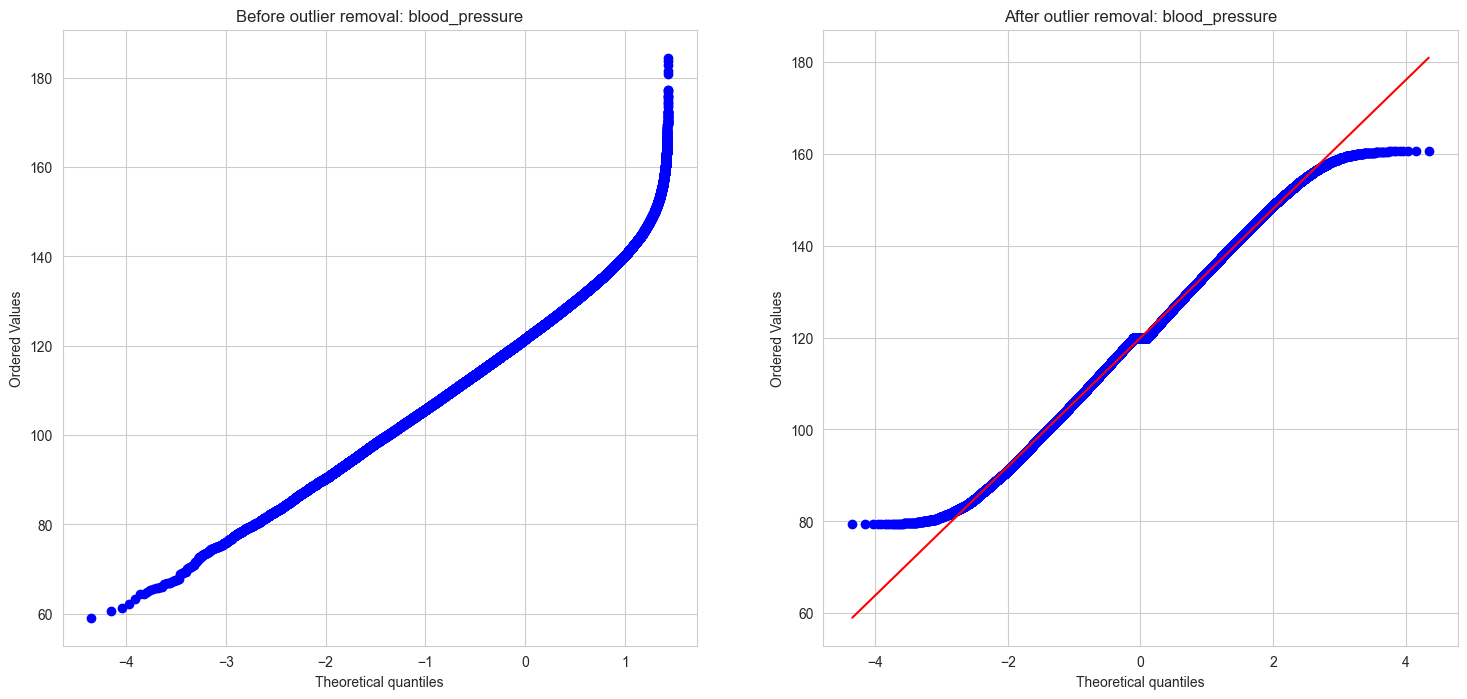

In [29]:
# Probability plot before and after cleaned data
# A probplot is used to determine if the data is normally distributed and identify outliers.

sns.set_style("whitegrid")
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
stats.probplot(df[feature], plot=plt)
plt.title(f"Before outlier removal: {feature}")

plt.subplot(1, 2, 2)
stats.probplot(df_cleaned[feature], plot=plt)
plt.title(f"After outlier removal: {feature}")


Left plot (Before outlier removal): Blood pressure values is far from the red reference line, especially at the high end (right tail).

Right plot (After outlier removal): The data aligns much closer to the diagonal line, meaning the cleaned data follows the normal distribution more closely.

Before cleaning, the distribution was positively skewed (long right tail).
After removing outliers, skewness decreases, giving a more symmetric spread around the mean.

## Exploratory Data Analysis after data cleaning

In [30]:
# Check target column
df_["target"].value_counts()

target
healthy     3450
diseased    1520
Name: count, dtype: int64

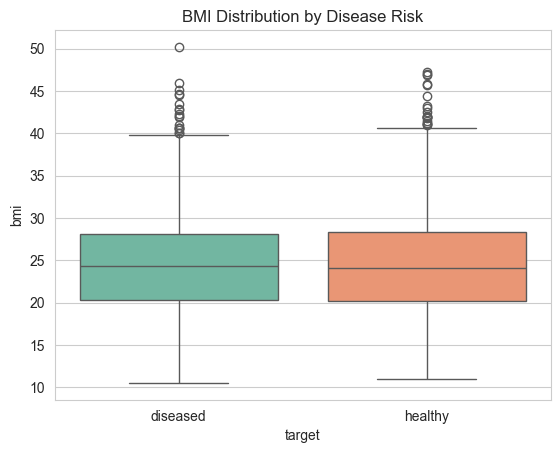

In [31]:
sns.boxplot(x="target", y="bmi", data=df_, palette="Set2")
plt.title("BMI Distribution by Disease Risk")
plt.show()

Diseased individuals and healthy individuals both have similar BMI, using boxplot it shows that bmi is not a risk factor.

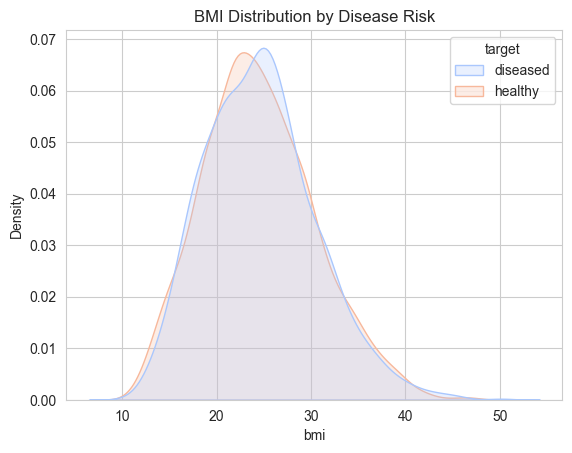

In [32]:
sns.kdeplot(data=df_, x="bmi", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("BMI Distribution by Disease Risk")
plt.show()

The density curves indicate that individuals with higher disease risk are more likely to have higher BMI values. 

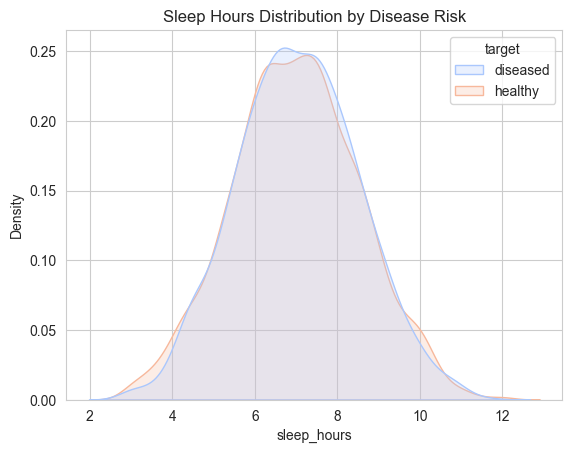

In [33]:
sns.kdeplot(data=df_, x="sleep_hours", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Sleep Hours Distribution by Disease Risk")
plt.show()

The extensive overlap suggests sleep duration alone is not a strong predictor.

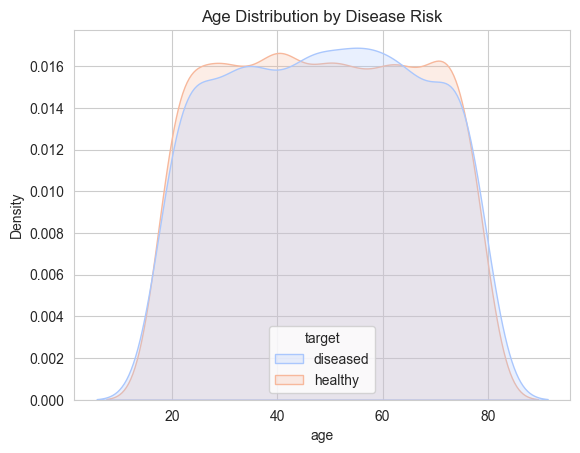

In [34]:
sns.kdeplot(data=df_, x="age", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Age Distribution by Disease Risk")
plt.show()

Age between 45-65 have higher disease risk.

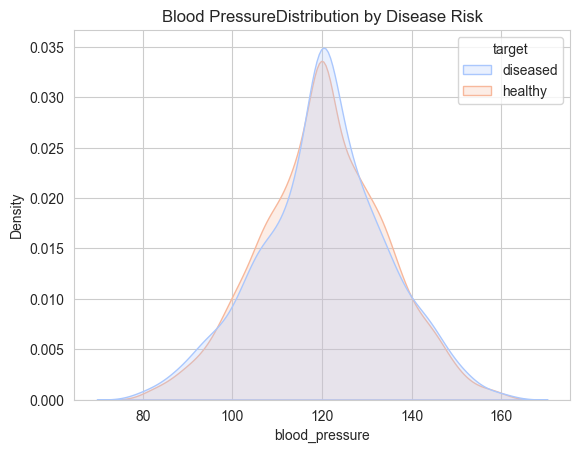

In [35]:
sns.kdeplot(data=df_, x="blood_pressure", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Blood PressureDistribution by Disease Risk")
plt.show()

High disease risk groups show a distribution skewed towards higher blood pressure values. This supports the known relationship between elevated blood pressure and increased disease risk.

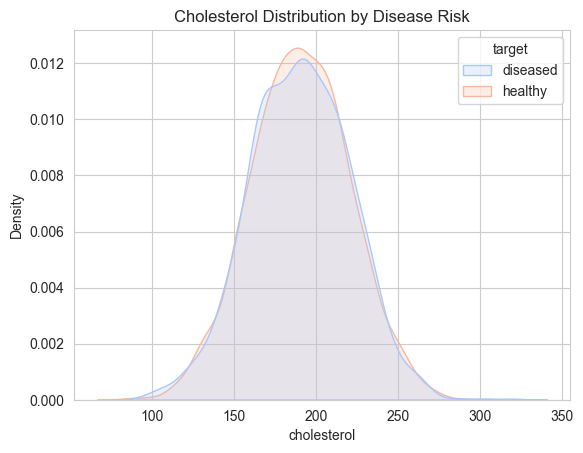

In [36]:

sns.kdeplot(data=df_, x="cholesterol", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Cholesterol Distribution by Disease Risk")
plt.show()

Cholesterol appears to be a poor predictor of disease risk in this dataset. While cholesterol is an established risk factor in large population studies, this dataset shows individual-level prediction is complex.

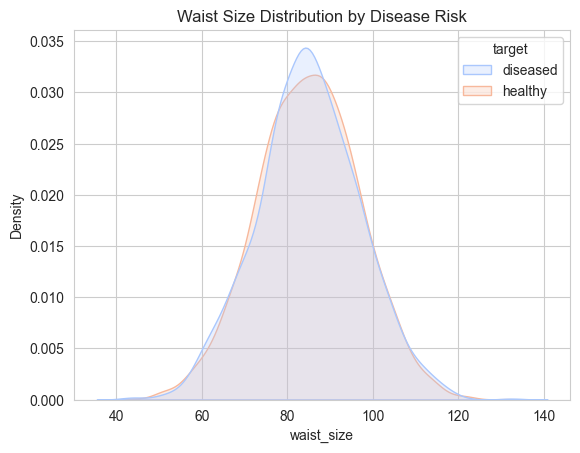

In [37]:
sns.kdeplot(data=df_, x="waist_size", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Waist Size Distribution by Disease Risk")
plt.show()

This distribution suggests that waist size is the most promising single predictor among the variables analyzed so far, showing meaningful differences between healthy and diseased populations.

Diseased Group has a higher density for 80-90cm (assuming centimetres) waist size. Waist circumference may be a better predictor of health risks than BMI due to easier to measure and more directly related to visceral fats.

In [38]:
df_cleaned.head(20)

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,Occasionally,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,Moderate,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,Occasionally,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,Strength,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy
5,25,Male,186.788025,55.276111,15.843073,86.591923,118.722971,51.971485,165.659179,99.496769,14.983414,10.065352,Poor,8.536500,3.581308,9221.120390,2565.731983,71.999679,Occasionally,Heavy,2.115213,7,6,No,High School,Office,Teacher,3667.151536,Vegetarian,Strength,Moderate,Yes,High,4,Moderate,Yes,Yes,-8.985465,healthy
6,78,Female,166.164733,65.035212,23.554335,67.838374,102.141757,70.472631,245.801110,91.821000,15.583876,4.342973,Excellent,6.206772,0.294640,7968.302176,1868.203785,53.836960,Occasionally,Heavy,1.704180,7,1,Yes,Bachelor,Unemployed,Engineer,3898.829196,Vegetarian,Strength,Poor,Yes,High,2,Moderate,No,No,-6.296536,healthy
7,38,Female,163.783995,47.756125,17.802712,73.071574,136.790243,65.791315,157.519344,106.466414,12.736925,6.659164,Poor,9.181722,1.783920,3606.509508,1885.142923,73.716032,Occasionally,Non-smoker,1.575306,7,2,No,Bachelor,Tech,Farmer,3360.848318,Omnivore,Strength,Moderate,Yes,Low,3,Moderate,No,Yes,7.875266,healthy
8,56,Female,165.716460,47.257109,17.208216,46.675208,133.536300,78.205237,160.148783,78.770043,14.983414,8.717906,Poor,11.461929,0.838778,5199.027338,1642.194189,84.438878,Occasionally,Light,2.337446,2,9,Yes,PhD,Office,Engineer,5366.332772,Vegan,Strength,Moderate,Yes,High,2,Moderate,No,No,-8.055654,healthy
9,75,Male,151.310888,65.966591,28.812682,94.294368,121.761602,90.470232,192.111798,130.681356,14.983414,8.184905,Fair,4.638267,2.341377,7436.828641,2508.233129,58.937603,Occasionally,Non-smoker,3.118364,10,9,No,Bachelor,Labor,Driver,4472.934549,Omnivore,Strength,Moderate,No,High,1,High,Yes,No,-3.035162,healthy


# Feature Engineering

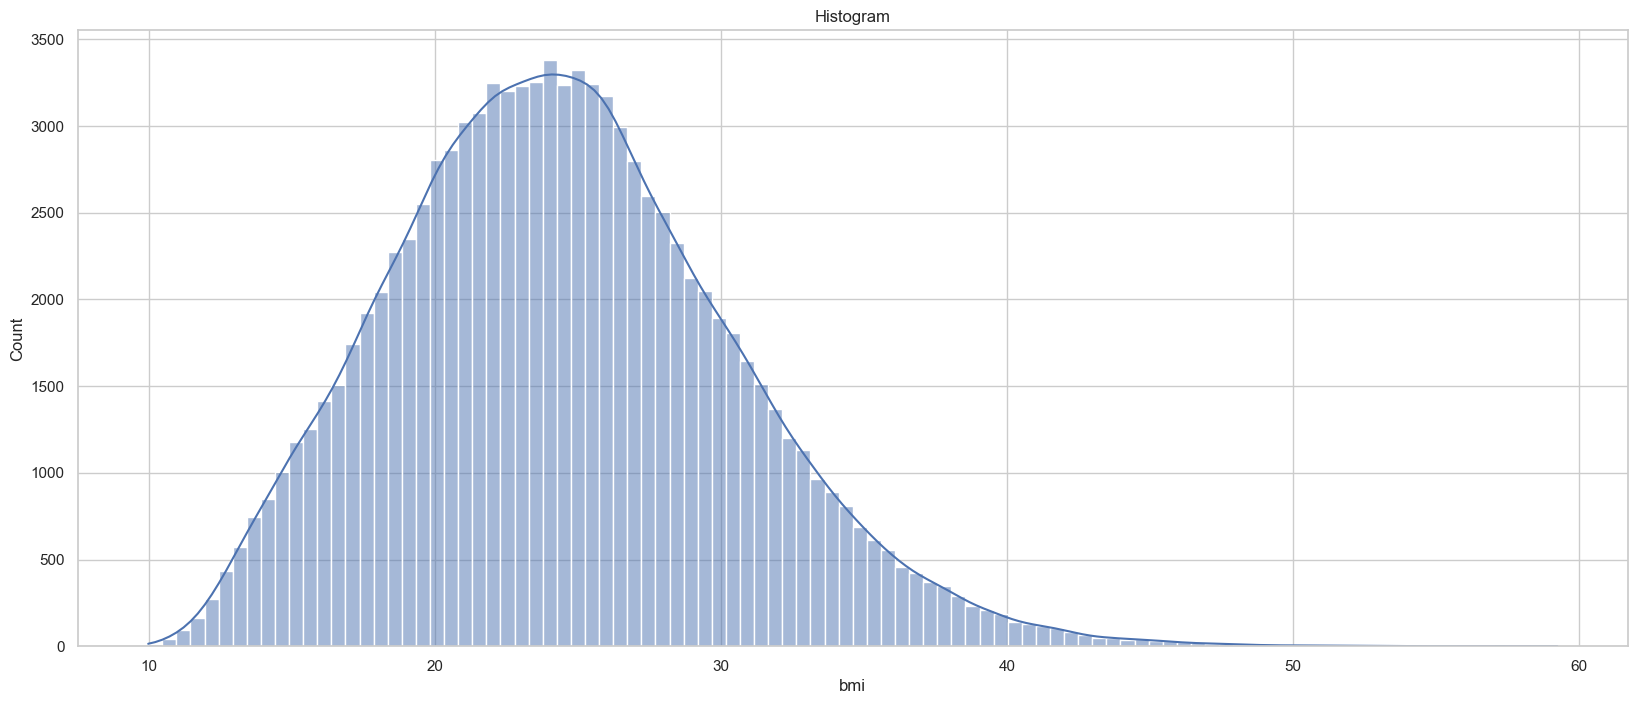

In [39]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 8))

sns.histplot(df_cleaned['bmi'], bins=100, kde=True)
plt.title("Histogram")
plt.show()

In [40]:
# Categorizes bmi: underweight (below 18.5), healthy weight (18.5–24.9), overweight (25.0–29.9), and obese (30.0 or greater))
df_cleaned.loc[:, 'bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['0-18.4', '18.5-24.8', '24.9-29.8', '29.9+']
)

In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99409 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      99409 non-null  int64   
 1   gender                   99409 non-null  object  
 2   height                   99409 non-null  float64 
 3   weight                   99409 non-null  float64 
 4   bmi                      99409 non-null  float64 
 5   waist_size               99409 non-null  float64 
 6   blood_pressure           99409 non-null  float64 
 7   heart_rate               99409 non-null  float64 
 8   cholesterol              99409 non-null  float64 
 9   glucose                  99409 non-null  float64 
 10  insulin                  99409 non-null  float64 
 11  sleep_hours              99409 non-null  float64 
 12  sleep_quality            99409 non-null  object  
 13  work_hours               99409 non-null  float64 
 14  physical_ac

In [42]:
df_cleaned.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target,bmi_category
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,Occasionally,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy,18.5-24.8
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy,29.9+
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy,24.9-29.8
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,Moderate,No,Yes,8.388611,healthy,18.5-24.8
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,Occasionally,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,Strength,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy,0-18.4


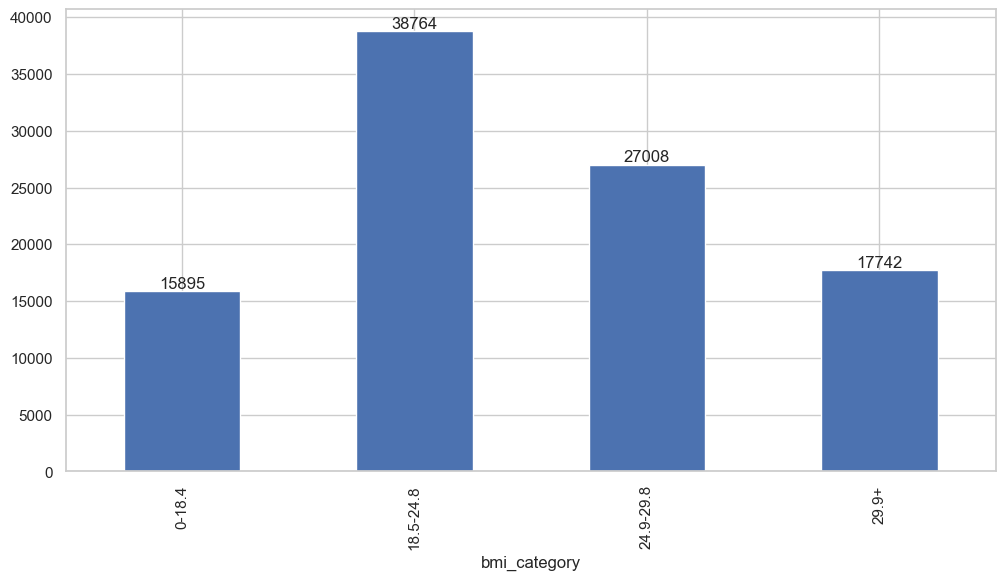

In [43]:
# Display bar plot for bmi categories
ax = df_cleaned['bmi_category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

# Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['gender_label'] = le.fit_transform(df_cleaned['gender'])

In [45]:
df_cleaned.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target,bmi_category,gender_label
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,Occasionally,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy,18.5-24.8,1
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy,29.9+,0
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy,24.9-29.8,1
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,Moderate,No,Yes,8.388611,healthy,18.5-24.8,0
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,Occasionally,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,Strength,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy,0-18.4,0


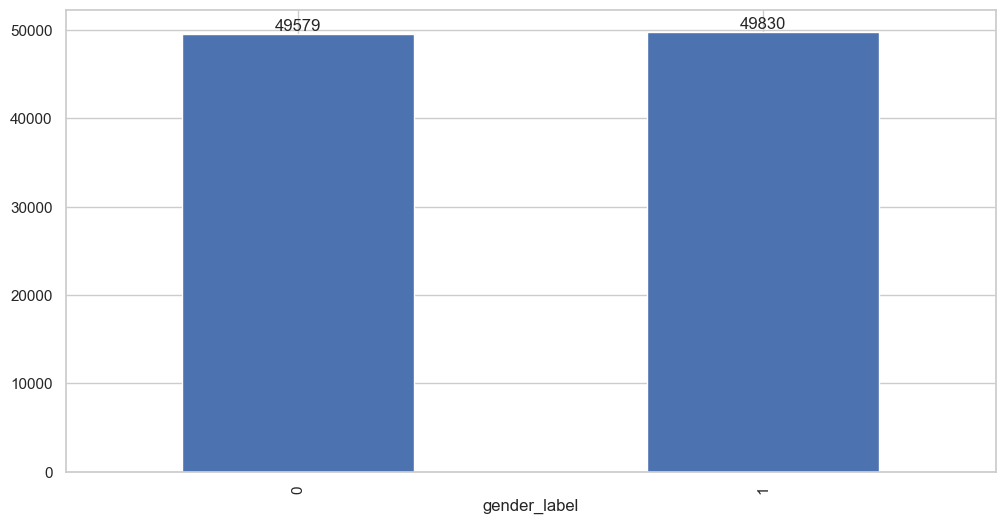

In [46]:
ax = df_cleaned['gender_label'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

In [47]:
le = LabelEncoder()
df_cleaned['alcohol_consumption_lbl'] = le.fit_transform(df_cleaned['alcohol_consumption'])
df_cleaned['smoking_level_lbl'] = le.fit_transform(df_cleaned['smoking_level'])
df_cleaned['mental_health_support_lbl'] = le.fit_transform(df_cleaned['mental_health_support'])
df_cleaned['education_level_lbl'] = le.fit_transform(df_cleaned['education_level'])
df_cleaned['target_lbl'] = le.fit_transform(df_cleaned['target'])

The dataset contains several categorical variables like gender, alcohol_consumption, smoking_level, mental_health_support, education_level, and target. These are categorical variables that can be converted to numerical format for machine learning models.

Some of these categorical variables have an inherent order or hierarchy:
education_level: Different levels of education naturally have an order
smoking_level: Levels of smoking intensity have a natural progression

And some variables like gender, target are binary, making them ideal for label encoding since there are only two possible values.

Unlike One-Hot Encoding which creates multiple new columns for each category, Label Encoding converts categories into single integer columns, keeping the dataset's dimensionality manageable. This is particularly important since this dataset has multiple categorical columns.

I selected Label Encoding because I will use Gradient Boosting Classifier and Random Forest Regressor later in this analysis, of which these two algorithms can handle label-encoded categorical variables well, as these models can capture the relationships between encoded values effectively.


In [48]:
df_cleaned.head(10)

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target,bmi_category,gender_label,alcohol_consumption_lbl,smoking_level_lbl,mental_health_support_lbl,education_level_lbl,target_lbl
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,Occasionally,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy,18.5-24.8,1,0,2,0,3,1
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy,29.9+,0,1,1,0,1,1
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy,24.9-29.8,1,1,0,0,2,1
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,Moderate,No,Yes,8.388611,healthy,18.5-24.8,0,0,0,0,2,1
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,Occasionally,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,Strength,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy,0-18.4,0,0,0,1,2,1
5,25,Male,186.788025,55.276111,15.843073,86.591923,118.722971,51.971485,165.659179,99.496769,14.983414,10.065352,Poor,8.536500,3.581308,9221.120390,2565.731983,71.999679,Occasionally,Heavy,2.115213,7,6,No,High School,Office,Teacher,3667.151536,Vegetarian,Strength,Moderate,Yes,High,4,Moderate,Yes,Yes,-8.985465,healthy,0-18.4,1,0,0,0,1,1
6,78,Female,166.164733,65.035212,23.554335,67.838374,102.141757,70.472631,245.801110,91.821000,15.583876,4.342973,Excellent,6.206772,0.294640,7968.302176,1868.203785,53.836960,Occasionally,Heavy,1.704180,7,1,Yes,Bachelor,Unemployed,Engineer,3898.829196,Vegetarian,Strength,Poor,Yes,High,2,Moderate,No,No,-6.296536,healthy,18.5-24.8,0,0,0,1,0,1
7,38,Female,163.783995,47.756125,17.802712,73.071574,136.790243,65.791315,157.519344,106.466414,12.736925,6.659164,Poor,9.181722,1.783920,3606.509508,1885.142923,73.716032,Occasionally,Non-smoker,1.575306,7,2,No,Bachelor,Tech,Farmer,3360.848318,Omnivore,Strength,Moderate,Yes,Low,3,Moderate,No,Yes,7.875266,healthy,0-18.4,0,0,2,0,0,1
8,56,Female,165.716460,47.257109,17.208216,46.675208,133.536300,78.205237,160.148783,78.770043,14.983414,8.717906,Poor,11.461929,0.838778,5199.027338,1642.194189,84.438878,Occasionally,Light,2.337446,2,9,Yes,PhD,Office,Engineer,5366.332772,Vegan,Strength,Moderate,Yes,High,2,Moderate,No,No,-8.055654,healthy,0-18.4,0,0,1,1,3,1
9,75,Male,151.310888,65.966591,28.812682,94.294368,121.761602,90.470232,192.111798,130.681356,14.983414,8.184905,Fair,4.638267,2.341377,7436.828641,2508.233129,58.937603,Occasionally,Non-smoker,3.118364,10,9,No,Bachelor,Labor,Driver,4472.934549,Omnivore,Strength,Moderate,No,High,1,High,Yes,No,-3.035162,healthy,24.9-29.8,1,0,2,0,0,1


# Feature Scaling

In [49]:
disease_risk_numerical_df = df_cleaned[['age', 'height', 'weight', 'bmi', 'waist_size', 'blood_pressure',
       'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours',]].copy() 

disease_risk_numerical_df.head()  

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours
0,56,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885
1,69,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410
2,46,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164
3,32,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316
4,60,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514


In [50]:
disease_risk_numerical_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,99409.0,48.529107,17.887340,18.000000,33.000000,48.000000,64.000000,79.000000
height,99409.0,170.023928,9.984255,140.000000,163.307090,170.018682,176.729046,210.000000
weight,99409.0,70.066682,14.697546,40.000000,59.857625,69.922435,80.038193,139.250894
bmi,99409.0,24.494641,5.953189,9.988495,20.270959,24.157225,28.260058,59.234792
waist_size,99409.0,84.933065,12.039684,34.093185,76.797040,84.960222,93.017639,133.153631
blood_pressure,99409.0,119.963485,14.045306,79.354041,110.872342,119.951794,129.098995,160.579138
heart_rate,99409.0,74.978954,9.219906,34.745092,69.540937,75.046211,80.468159,114.136041
cholesterol,99409.0,189.968491,29.991370,58.410902,169.662546,190.054152,210.234192,319.875613
glucose,99409.0,100.001288,19.982069,12.434931,86.471358,99.995207,113.518174,183.883548
insulin,99409.0,14.987779,4.587974,-6.794483,12.326254,14.983414,17.663552,35.464749


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to range [0,1]
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaled_data = min_max_scaler.fit_transform(disease_risk_numerical_df)
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=disease_risk_numerical_df.columns)

In [52]:
min_max_scaled_df.head()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours
0,0.622951,0.477384,0.170141,0.181281,0.384330,0.479042,0.327553,0.597288,0.528282,0.515341,0.386209
1,0.836066,0.331534,0.582361,0.542737,0.519942,0.474779,0.399524,0.219468,0.609338,0.400530,0.603157
2,0.459016,0.532600,0.409947,0.318492,0.567349,0.538253,0.520187,0.304913,0.447629,0.515341,0.300240
3,0.229508,0.458589,0.233175,0.230068,0.670409,0.847268,0.428725,0.553063,0.676243,0.604073,0.243146
4,0.688525,0.337269,0.000000,0.100613,0.352592,0.877304,0.725401,0.543100,0.480484,0.540312,0.545835


In [53]:
min_max_scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,99409.0,0.500477,0.293235,0.0,0.245902,0.491803,0.754098,1.0
height,99409.0,0.428913,0.142632,0.0,0.332958,0.428838,0.524701,1.0
weight,99409.0,0.302936,0.148085,0.0,0.200075,0.301483,0.403404,1.0
bmi,99409.0,0.294563,0.120886,0.0,0.208797,0.287712,0.371024,1.0
waist_size,99409.0,0.513221,0.121539,0.0,0.431089,0.513495,0.594833,1.0
blood_pressure,99409.0,0.499962,0.172918,0.0,0.388036,0.499818,0.612433,1.0
heart_rate,99409.0,0.506781,0.116133,0.0,0.438285,0.507629,0.575923,1.0
cholesterol,99409.0,0.503156,0.114705,0.0,0.425494,0.503484,0.580665,1.0
glucose,99409.0,0.510744,0.116548,0.0,0.431829,0.510709,0.589583,1.0
insulin,99409.0,0.515444,0.108567,0.0,0.452463,0.515341,0.578762,1.0


In [54]:
df_cleaned['target'].value_counts()

target
healthy     69681
diseased    29728
Name: count, dtype: int64

In [55]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99409 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        99409 non-null  int64   
 1   gender                     99409 non-null  object  
 2   height                     99409 non-null  float64 
 3   weight                     99409 non-null  float64 
 4   bmi                        99409 non-null  float64 
 5   waist_size                 99409 non-null  float64 
 6   blood_pressure             99409 non-null  float64 
 7   heart_rate                 99409 non-null  float64 
 8   cholesterol                99409 non-null  float64 
 9   glucose                    99409 non-null  float64 
 10  insulin                    99409 non-null  float64 
 11  sleep_hours                99409 non-null  float64 
 12  sleep_quality              99409 non-null  object  
 13  work_hours                 99409 non

# Feature Selection

In [56]:

# Binary classification

def LogisticRegressionClassifier(X, y):
    # Train-test split on reduced dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    print("Accuracy on test set:", np.round(model.score(X_test, y_test), 2))

ANOVA Feature Selection

- Works only with numerical independent variables and categorical dependent variables (classification).
- Since this dataset has a combination of numerical and categorical variables/features, this algorithm might not the best suited algorithm. 
- Just testing this method out to see the results.

In [57]:
# synthetic dataset

df_copy = df_cleaned.copy()
X, y = make_classification(n_samples=1000, n_features=44, n_informative=10, n_redundant=10, random_state=42)
feature_names = [f"F{i}" for i in range(X.shape[1])]
df_copy = pd.DataFrame(X, columns=feature_names)


# Apply ANOVA
# This code selects the 10 best features from X that have the strongest statistical relationship with y 
# according to the ANOVA F-test, and returns a new dataset (X_new) with only those features.
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(df_copy, y)

# Get mask of selected features
mask = selector.get_support()

# Get feature names
selected_features = df_copy.columns[mask]

print("Selected Features:", list(selected_features))

Selected Features: ['F4', 'F10', 'F11', 'F21', 'F23', 'F28', 'F32', 'F34', 'F35', 'F37']


In [58]:
df_copy.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43
0,1.669383,1.001326,0.087964,0.658820,0.846090,-0.656770,-0.089726,-7.458034,0.424920,0.732477,0.861921,0.426734,0.910461,1.676190,0.944427,-2.401841,0.016906,-6.817408,-0.507028,-0.510777,3.717735,-2.803219,-3.095913,-10.471192,-1.384597,2.340300,-6.667053,-0.790674,-12.188646,-4.166354,1.006251,0.354773,3.909672,1.939691,-0.261673,-2.269586,-5.719069,-0.360782,-0.228880,1.065852,1.676651,-0.402668,-0.710271,0.353566
1,-0.606204,1.190005,0.077708,0.915318,-4.689261,1.213598,1.591309,-0.567183,0.734482,1.570886,-0.904405,-3.592551,-0.122654,0.236097,1.397906,1.595364,1.105089,3.936440,0.043588,0.640337,2.911858,1.298261,-1.017061,-1.978258,-1.782875,0.349730,-2.746229,0.478531,-0.930421,1.944827,-0.033411,-0.567748,-3.553215,0.072400,1.424551,-1.128041,-2.580220,4.354565,-0.051560,-0.778688,0.128771,-0.107294,0.977908,-0.368485
2,-1.784944,0.300175,0.039907,-0.420986,6.455230,0.718332,-1.979330,-6.585042,-0.037008,-0.359906,-2.213729,0.200340,-1.142791,-0.101198,-1.588563,0.834435,-0.202924,-5.939053,0.563410,-0.247707,3.338816,0.289602,-1.876422,-0.163084,-0.922977,-1.487154,-6.023053,1.900832,-0.125756,3.078572,1.682888,-0.054746,1.289803,0.093906,-0.881841,2.963316,-5.791315,-1.836488,0.090042,3.964850,-0.841048,-0.137212,-0.766870,0.340865
3,0.255123,0.313251,-1.006793,-0.512105,2.813629,-1.847400,-0.811144,-1.165509,-0.149675,-0.974836,-0.563534,0.113227,0.599228,-0.226591,-1.556186,-0.478176,-1.247190,-0.722845,-0.275853,-0.808245,-0.271146,4.021632,-0.383028,-3.728539,0.264301,1.242696,-1.883324,0.836231,-0.152766,-0.578282,-0.727759,-0.168242,0.715745,2.368393,1.583594,0.874881,-3.364372,2.248860,-0.206508,1.239316,0.193628,-1.460150,-0.739924,0.476773
4,-1.076482,-1.065442,1.822073,0.442407,11.261940,-1.118924,0.663893,-4.192671,0.327569,0.807661,-0.938638,4.154660,0.432443,0.016526,-5.405109,1.826786,-0.742988,-3.014069,0.398937,-0.309284,1.913136,8.613459,1.816219,-4.369113,-0.385105,1.030118,-4.089956,-1.854609,4.489850,1.675892,-0.092619,-0.765584,0.912859,-0.732636,6.378151,1.374976,-3.751901,1.242688,-0.163950,0.415099,-1.489936,0.864516,0.530596,-1.305462


In [59]:
df_cleaned.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target,bmi_category,gender_label,alcohol_consumption_lbl,smoking_level_lbl,mental_health_support_lbl,education_level_lbl,target_lbl
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,Occasionally,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy,18.5-24.8,1,0,2,0,3,1
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy,29.9+,0,1,1,0,1,1
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy,24.9-29.8,1,1,0,0,2,1
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,Moderate,No,Yes,8.388611,healthy,18.5-24.8,0,0,0,0,2,1
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,Occasionally,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,Strength,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy,0-18.4,0,0,0,1,2,1


In [60]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99409 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        99409 non-null  int64   
 1   gender                     99409 non-null  object  
 2   height                     99409 non-null  float64 
 3   weight                     99409 non-null  float64 
 4   bmi                        99409 non-null  float64 
 5   waist_size                 99409 non-null  float64 
 6   blood_pressure             99409 non-null  float64 
 7   heart_rate                 99409 non-null  float64 
 8   cholesterol                99409 non-null  float64 
 9   glucose                    99409 non-null  float64 
 10  insulin                    99409 non-null  float64 
 11  sleep_hours                99409 non-null  float64 
 12  sleep_quality              99409 non-null  object  
 13  work_hours                 99409 non

In [61]:
print("\nLogistic Regression on Selected Features:")
LogisticRegressionClassifier(X_new, y)

print("\nLogistic Regression on All Features:")
LogisticRegressionClassifier(X, y)


Logistic Regression on Selected Features:
Accuracy on test set: 0.88

Logistic Regression on All Features:
Accuracy on test set: 0.84


Random Forest Feature Selection

The dataset includes both numerical features (age, BMI, blood pressure) and categorical features (gender, education_level, smoking_level).

Random Forest can effectively handle both types of features simultaneously without requiring separate preprocessing.

Random Forest provides feature importance scores which help identify the most influential factors in disease risk prediction, which is crucial for healthcare applications.

Random Forest is less sensitive to outliers compared to linear methods because it uses decision trees and doesn't require assumptions about the underlying distribution of features.

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Load CSV
data = pd.read_csv("data/health_lifestyle_classification.csv")

# Separate features and target
X = data.drop(columns=["target"])   # replace with your actual target column name
y = data["target"]

# One-hot encode all categorical columns automatically
X = pd.get_dummies(X, drop_first=True)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Top features by Random Forest importance:")
print(importances.head(5))

threshold = 0.037
selected_features = importances[importances > threshold].index.tolist()
print("\nSelected features (importance > 0.037):", selected_features)


Top features by Random Forest importance:
heart_rate        0.039905
insulin           0.039512
blood_pressure    0.039471
daily_steps       0.038971
income            0.038379
dtype: float64

Selected features (importance > 0.037): ['heart_rate', 'insulin', 'blood_pressure', 'daily_steps', 'income']


Summary
1. Random Forest can capture non-linear interactions while ANOVA is limited to linear relationships between variables.


# Supervised Learning

Gradient Boosting Classifier

I choose Gradient Boosting Classifier because it can handle mixed numeric features well, without requiring linear relationships or heavy assumptions.

Lifestyle‐health relationships often aren’t simple and linear (e.g., the effect of “sleep hours” might depend on “stress level” or “physical activity”). Gradient boosting is good at modelling complex patterns.

It is relatively robust to irrelevant features as tree‐based models are more robust than simple linear models to noisy or less informative features. 

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

df_2 = df_cleaned.copy()
categorical_features_2 = df_2.select_dtypes(include=['object', 'category']).columns
df_2 = df_2.drop(columns=categorical_features_2)

# Train-test split
# X_cls, y_cls = df_2, df_2.target_lbl

# Remove target column from features
X_cls = df_2.drop(columns=["target_lbl"])
y_cls = df_2["target_lbl"]

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
tp, fn, fp, tn = conf_matrix.ravel()

conf_df = pd.DataFrame(
    [[tp, fn], [fp, tn]],
    index=["Actual Diseased", "Actual Healthy"],
    columns=["Predicted Diseased", "Predicted Healthy"]
)

print("\nConfusion Matrix\n\n", conf_df)

print(f"\nTrue Positives (TP - diseased correctly predicted): {tp}")
print(f"False Negatives (FN - diseased predicted as healthy): {fn}")
print(f"False Positives (FP - healthy predicted as diseased): {fp}")
print(f"True Negatives (TN - healthy correctly predicted): {tn}")


# Precision, Recall, F1 for malignant class (pos_label=0)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)

print(f"\nPrecision (Malignant): {precision:.2f}")
print(f"Recall/Sensitivity (Malignant): {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Heatmap with TP, FN, FP, TN annotations
labels = [
    [f"TP = {tp}", f"FN = {fn}"],
    [f"FP = {fp}", f"TN = {tn}"]
]

Before SMOTE: target_lbl
1    55745
0    23782
Name: count, dtype: int64
After SMOTE: target_lbl
1    55745
0    55745
Name: count, dtype: int64

Confusion Matrix

                  Predicted Diseased  Predicted Healthy
Actual Diseased                1752               4194
Actual Healthy                 4081               9855

True Positives (TP - diseased correctly predicted): 1752
False Negatives (FN - diseased predicted as healthy): 4194
False Positives (FP - healthy predicted as diseased): 4081
True Negatives (TN - healthy correctly predicted): 9855

Precision (Malignant): 0.30
Recall/Sensitivity (Malignant): 0.29

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.29      0.30      5946
           1       0.70      0.71      0.70     13936

    accuracy                           0.58     19882
   macro avg       0.50      0.50      0.50     19882
weighted avg       0.58      0.58      0.58     19882



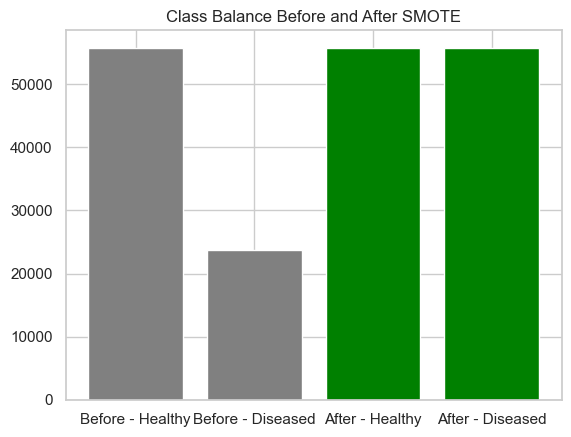

In [64]:
plt.bar(["Before - Healthy", "Before - Diseased"], y_train.value_counts(), color='gray')
plt.bar(["After - Healthy", "After - Diseased"], y_train_res.value_counts(), color='green')
plt.title("Class Balance Before and After SMOTE")
plt.show()


However, the model leans heavily toward predicting “Healthy”, which is common when the dataset is imbalanced (far more healthy samples than diseased).

Recall for Diseased (0.29) is low — this means the model misses over 70% of real diseased cases.

Even after SMOTE or balancing, this result suggests the model still struggles to capture the minority class patterns.

This suggests that even though Gradient Boosting is powerful, but may still underperform if:
The dataset is highly imbalanced.
There are weak correlations between features and disease outcome.

Random Forest Regressor

In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
# Train RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Show first 10 predictions vs actual values
results_df = pd.DataFrame({
    "Actual": y_test[:10],
    "Predicted": y_pred[:10],
    "Error": np.abs(y_test[:10] - y_pred[:10])
})
print("\nFirst 10 Predictions:\n", results_df)

RMSE: 0.46

First 10 Predictions:
        Actual  Predicted  Error
97126       0       0.69   0.69
80642       1       0.62   0.38
54581       0       0.57   0.57
99835       1       0.64   0.36
5373        1       0.70   0.30
19918       1       0.62   0.38
61420       1       0.80   0.20
36957       1       0.67   0.33
21726       1       0.67   0.33
65470       1       0.58   0.42


The Random Forest Regressor was chosen for its ability to model complex, non-linear relationships among diverse health and lifestyle features in the Disease Risk from Daily Habits dataset. As an ensemble of decision trees, it reduces overfitting, handles mixed data types, and provides interpretable feature importance to identify key risk factors. The model is also robust to noise and large datasets.


For model evaluation, the Root Mean Squared Error (RMSE) was employed as the primary performance metric. RMSE measures the average magnitude of prediction errors in the same scale as the target variable, offering clear interpretability. It penalises larger errors more heavily, which is desirable when predicting sensitive outcomes like disease risk, where large deviations can have greater significance. 

The model achieved an RMSE of 0.46, indicating a moderate level of predictive accuracy and suggesting that the Random Forest Regressor can reasonably estimate disease risk probabilities while leaving scope for further refinement.

In [68]:
df_2.head()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,water_intake,stress_level,mental_health_score,income,meals_per_day,daily_supplement_dosage,gender_label,alcohol_consumption_lbl,smoking_level_lbl,mental_health_support_lbl,education_level_lbl,target_lbl
0,56,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885,7.671313,0.356918,13320.942595,2673.546960,44.476887,1.694262,2,8,6759.821719,5,-2.275502,1,0,2,0,3,1
1,69,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,9.515198,0.568219,11911.201401,2650.376972,74.663405,0.716409,3,9,6240.517690,5,6.239340,0,1,1,0,1,1
2,46,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164,5.829853,3.764406,2974.035375,1746.755144,19.702382,2.487900,0,1,3429.179266,4,5.423737,1,1,0,0,2,1
3,32,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,9.489693,0.889474,5321.539497,2034.193242,82.580050,2.643335,10,4,2618.503534,1,8.388611,0,0,0,0,2,1
4,60,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,7.275450,2.901608,9791.376712,2386.210257,45.961322,1.968393,9,7,3662.086276,1,0.332622,0,0,0,1,2,1


In [81]:

from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

# 1. Load dataset 

X = df_2.drop(columns=["target_lbl"])
y = df_2.target_lbl
feature_names = df_2.columns
class_names = "target_lbl"

# 2. Train a model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# 3. Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=class_names,
    mode="classification"
)

# 4. Pick a test instance to explain
i = 10
exp = explainer.explain_instance(
    data_row=X_test[i],
    predict_fn=model.predict_proba
)

# 5. Show explanation
print("True class:", class_names[y_test[i]])
print("Predicted class:", class_names[model.predict([X_test[i]])[0]])# For Jupyter
explanation_list = exp.as_list()

# Convert to DataFrame
df_explanation = pd.DataFrame(explanation_list, columns=["Feature", "Contribution"])

print(df_explanation)


InvalidIndexError: (slice(None, None, None), 0)